# Homework 6
 
**Harvard University**<br>
**Spring 2018**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Friday, March 9th, 2018 at 11:00am

**Instructions:**

- Upload your iPython notebook containing all work to Canvas.

- Structure your notebook and your work to maximize readability.

## Name: Christopher Hase

## Collaborators: Casey Meehan

In [77]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 1: Metropolis and Chill

Suppose we ask you to memorize the order of the top five movies on IMDB. When we quiz you on the order afterwards, you might not recall the correct order, but the mistakes you will tend to make in your recall can be modeled by simple probabilistic models.
  
Let's say that the top five movies are:  
1. *The Shawshank Redemption*
2. *The Godfather*
3. *Wonder Woman*
4. *Black Panther*
5. *Pulp Fiction*

Let's represent this ordering by the vector $\omega = (1,2,3,4,5)$. 

If you were to mistakenly recall the top five movies as:
2. *The Godfather*
3. *Wonder Woman*
5. *Pulp Fiction*
4. *Black Panther*
1. *The Shawshank Redemption*

We'd represent your answer by the vector $\theta = (2,3,5,4,1)$.

Now, we have a way of quantifying how wrong your answer can be. We define the Hamming distance between two top five rankings, $\theta, \omega$, as follows:
$$d(\theta, \omega) = \sum_{i=1}^5 \mathbb{I}_{\theta_i\neq \omega_i},$$ 
where $\mathbb{I}_{\theta_i\neq \omega_i}$ is the indicator function that returns 1 if $\theta_i\neq \omega_i$, and 0 otherwise.

For example, the Hamming distance between your answer and the correct answer is $d(\theta, \omega)=4$, because you only ranked *Black Panther* in both answers correctly. 

Finally, let's suppose that the probability of giving a particular answer (expressed as $\theta$) is modeled as
$$ p(\theta \,|\, \omega, \lambda) \propto  e^{-\lambda\, d(\theta,\, \omega)}.$$

### Part A:

Implement an Metropolis algorithm to produce sample guesses from 500 individuals, with various $\lambda$ values, $\lambda=0.2, 0.5, 1.0$. What are the top five possible guesses?

### Part B:
Using the Metropolis algorithm, compute the probability that *The Shawshank Redemption* is ranked as the top movie (ranked number 1) . Compare the resulting probabilities for the various different $\lambda$ values. Summarize your findings.

# Part A: Implement an Metropolis algorithm to produce sample guesses from 500 individuals, with various  λ values,  λ=0.2,0.5,1.0

### Create Target Dist: 

In [78]:
#hamming distance 
def hamming(theta): 
    omega = np.arange(1,6)
    return np.sum(theta != omega)

def p_theta(theta, lam): 
    return np.exp(-lam * hamming(theta))

### Create Proposal: 

In [79]:
#Use symmetric proposal but uniformly choosing 2 indices to switch: 
def prop(x):
    inds = np.arange(5)
    switch = np.random.choice(inds, 2, replace = False) 
    xp1 = np.copy(x)
    xp1_a = xp1[switch[0]]
    xp1[switch[0]] = xp1[switch[1]]
    xp1[switch[1]] = xp1_a
    return xp1 

def prop2(x): 
    inds = np.arange(1,6)
    return np.random.choice(inds, 5, replace = False)

### Modify metropolis code from lab

In [80]:
def metropolis(p, qdraw, nsamp, xinit):
    samples=np.zeros((nsamp, 5))
    x_prev = xinit
    accepted=0
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        #print(x_star, pdfratio)
        if np.random.uniform() < min(1, pdfratio):
            samples[i,:] = x_star
            x_prev = x_star
            accepted +=1
        else:#we always get a sample
            samples[i,:]= x_prev
            
    return samples, accepted

### Compute Top 5 Possible Guesses from samples 

In [81]:
def top_5(samples): 
    """
    returns top 5 samples and the respective counts
    """
    vals, cts = np.unique(samples, return_counts = True, axis = 0)
    order = np.argsort(cts)[::-1]
    tops = vals[order]
    top_cts = cts[order]
    return tops[0:5,:], top_cts[0:5]

### Run 500 samples for each value of $\lambda$. Leaving 50 samples of burn-in

### $\lambda = 0.2$ 

In [83]:
Nsteps = 550
xinit = prop2(np.arange(1,6))
p_p2 = lambda thet : p_theta(thet, 0.2)
samp_p2, acc_p2 = metropolis(p_p2, prop2, Nsteps,  xinit)
top_samps_p2, top_cts_p2 = top_5(samp_p2[50:,:])
print('% accepted:', acc_p2 / Nsteps)
print('top samples: \n', top_samps_p2)
print('top samples counts: \n', top_cts_p2)

% accepted: 0.8709090909090909
top samples: 
 [[ 1.  2.  3.  4.  5.]
 [ 1.  4.  2.  3.  5.]
 [ 4.  5.  1.  3.  2.]
 [ 3.  2.  5.  4.  1.]
 [ 4.  1.  3.  2.  5.]]
top samples counts: 
 [15 13 11 10 10]


### $\lambda = 0.5$

In [84]:
Nsteps = 550
xinit = prop2(np.arange(1,6))
p_p5 = lambda thet : p_theta(thet, 0.5)
samp_p5, acc_p5 = metropolis(p_p5, prop2, Nsteps,  xinit)
top_samps_p5, top_cts_p5 = top_5(samp_p5[50:,:])
print('% accepted:', acc_p5 / Nsteps)
print('top samples: \n', top_samps_p5)
print('top samples counts: \n', top_cts_p5)

% accepted: 0.7163636363636363
top samples: 
 [[ 1.  2.  4.  3.  5.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  5.  3.  4.  1.]
 [ 1.  4.  3.  2.  5.]
 [ 2.  1.  3.  4.  5.]]
top samples counts: 
 [18 17 17 14 14]


### $\lambda = 1.0$

In [85]:
Nsteps = 550
xinit = prop2(np.arange(1,6))
p_1 = lambda thet : p_theta(thet, 1)
samp_1, acc_1 = metropolis(p_1, prop2, Nsteps,  xinit)
top_samps_1, top_cts_1 = top_5(samp_1[50:,:])
print('% accepted:', acc_1 / Nsteps)
print('top samples: \n', top_samps_1)
print('top samples counts: \n', top_cts_1)

% accepted: 0.30363636363636365
top samples: 
 [[ 1.  2.  3.  4.  5.]
 [ 1.  2.  4.  3.  5.]
 [ 1.  2.  3.  5.  4.]
 [ 5.  2.  3.  4.  1.]
 [ 4.  2.  3.  1.  5.]]
top samples counts: 
 [187  31  22  20  19]


# Part B: Using the Metropolis algorithm, compute the probability that The Shawshank Redemption is ranked as the top movie (ranked number 1) . Compare the resulting probabilities for the various different  λ values. Summarize your findings.

A higher $\lambda$ makes the probability of shawshank=1 quite a bit higher. This is because shawshank is the correct answer, and a higher $\lambda$ makes the relative probability of the correct answer much higher. In other words $\lambda$ is a 1-d measure of 'memory'. Higher $\lambda$, more likely it is you'll remember the correct answer.

### $\lambda = 0.2$ 

In [89]:
p_shank_p2 = np.sum(samp_p2[:,0] == 1.) / Nsteps
print('prob shawshank, lambda = 0.2:', p_shank_p2)

prob shawshank, lambda = 0.2: 0.252727272727


### $\lambda = 0.5$

In [90]:
p_shank_p5 = np.sum(samp_p5[:,0] == 1.) / Nsteps
print('prob shawshank, lambda = 0.5:', p_shank_p5)

prob shawshank, lambda = 0.5: 0.318181818182


### $\lambda = 1.0$

In [91]:
p_shank_1 = np.sum(samp_1[:,0] == 1.) / Nsteps
print('prob shawshank, lambda = 1:', p_shank_1)

prob shawshank, lambda = 1: 0.632727272727


## Problem 2: Lensed Galaxies via Metropolis-Hastings

You are a renowned observational astronomer working on gravitational lensing and you just got news about a source whose morphology appears distorted, most likely because there is a foreground source (an ensemble of mini black holes for which you know the mass and position) acting as a lens. Your gravitational lensing calculations indicate that the detected flux $F$ from the background source as a function of right ascencion ($x$) and declination ($y$) can be described by a modified Beale's function:

$F(x,y) = \exp\left[-\left(\frac{x^2}{2\sigma_x^2}+\frac{y^2}{2\sigma_y^2}\right)\right] \log (1.0+(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2) $

with $\sigma_x = \sigma_y = \sqrt{10}$

You are interested in observing this source with the Hubble Space Telescope, and you want to simulate beforehand how photons will form the image on the Hubble detector. You realize that a good way to do this is by sampling F(x,y) with a Monte Carlo method.

### Part A:

Using the following asymmetric function as a proposal distribution:

$q(x,y) = \frac{1}{\sqrt{2 \pi \gamma_1\gamma_2}} {\rm exp}\left[-\left(\frac{(x-0.1)^2}{2 \gamma_1^2} + \frac{(y-0.1)^2}{2 \gamma_2^2}\right) \right] $ 

with $\gamma_1 = 1.0\beta$, $\gamma_2 = 1.5\beta$, and $\beta=1$ (x and y are the coordinates of the proposed step if we center the coordinate system in our current position.)

construct a Metropolis-Hastings algorithm to produce $N=100,000$ samples from $F(x,y)$ with an initial position of $(x,y) = (5,-5)$. Plot the results.

### Part B:

We want to experiment with $\beta$ by running your code with $\beta$ in the range 0.1 to 40 (think about the appropriate order of magnitude of the $\beta$ spacing). 

1. Plot the accepted sample histories for each $\beta$. What is the acceptance rate for each $\beta$? 
2. Explain your results and select the "best" value of $\beta$?

### Part C:

Choose a symmetric proposal and construct a Metropolis algorithm to product $N=100,000$ samples from $F(x,y)$ with an initial position of $(x,y) = (5,-5)$. Plot the results.  How do the results compare to those from Metropolis-Hastings in **Parts A & B**?  

# Part A: Construct a Metropolis-Hastings algorithm to produce  N=100,000 samples from  F(x,y) with an initial position of  (x,y)=(5,−5). Plot the results.

### Make Proposal Dist: 

The proposal is effectively a bivariate normal (although unnomalized per the discussion in Piazza). There is no covariance. This is easy to sample from with numpy. 

The normal has a shift term of $[0.1, 0.1]$. So, given a point $[x, y]$, the proposal distribution should be
$$\mathbb{N}(\mu_{x,y}, \Sigma)$$ 
where 
$$ \mu_{x,y} = [x+0.1, y+0.1] $$
and 
$$
\Sigma = 
\begin{bmatrix}
\beta^2 & 0 \\
0 & (1.5\beta)^2
\end{bmatrix}
$$

$F(x,y) = \exp\left[-\left(\frac{x^2}{2\sigma_x^2}+\frac{y^2}{2\sigma_y^2}\right)\right] \log (1.0+(1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2) $

$q(x,y) = \frac{1}{\sqrt{2 \pi \gamma_1\gamma_2}} {\rm exp}\left[-\left(\frac{(x-0.1)^2}{2 \gamma_1^2} + \frac{(y-0.1)^2}{2 \gamma_2^2}\right) \right] $ 

In [92]:
#Proposal
def prop_mvn(xy, beta): 
    """
    input: 
    xy: [x,y]
    output: 
    [x_new, y_new]
    """
    cov = np.array([[beta**2, 0],[0, (1.5 * beta)**2]])
    sample = np.random.multivariate_normal(xy+0.1, cov)
    return sample

#Target
def F_targ(xy): 
    x = xy[0]
    y = xy[1]
    vx = 10
    vy = 10
    t0 = -((x**2) / (2*vx)) - ((y**2) / (2*vy))
    t1 = np.exp((t0))
    t2 = np.log(1. + (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2)
    return t1*t2 

#Transition Prob, unnormalized: 
def p_transition(xy0, xy1, beta): 
    """
    returns p(xy1 | xy0)
    """
    x0 = xy0[0]
    y0 = xy0[1]
    x1 = xy1[0]
    y1 = xy1[1]
    vx = beta**2
    vy = (1.5 * beta)**2
    expo = -((x0 - 0.1 - x1)**2 / (2*vx)) - ((y0 - 0.1 - y1)**2 / (2*vy))
    return np.exp(expo)

### Modify MH algorithm from lab

In [93]:
def MH(p, q, qdraw, nsamp, xinit):
    samples=np.empty((nsamp, 2))
    x_prev = xinit
    accepted=0
    for i in range(nsamp):
        x_star = qdraw(x_prev)
        p_star = p(x_star)
        p_prev = p(x_prev)
        pdfratio = p_star/p_prev
        proposalratio = q(x_prev, x_star)/q(x_star, x_prev)
        if np.random.uniform() < min(1, pdfratio*proposalratio):
            samples[i,:] = x_star
            x_prev = x_star
            accepted +=1
        else:#we always get a sample
            samples[i,:]= x_prev
            
    return samples, accepted

### Sample for $\beta = 1$ 

In [94]:
beta = 1
p_tran_1 = lambda xy0, xy1 : p_transition(xy0, xy1, beta)
prop_1 = lambda xy : prop_mvn(xy, beta)
Nsamps = 100000
xinit = np.array([-5,-5])
samps_1, acc_1 = MH(F_targ, p_tran_1, prop_1, Nsamps, xinit)

### Plot Results

In [95]:
#Make grid of target dist pts: 
def F_targ_grid(xs, ys): 
    xsize = np.size(xs)
    ysize = np.size(ys)
    grid = np.zeros((xsize, ysize)) 
    ysr = ys[::-1]
    for i in range(xsize): 
        for j in range(ysize): 
            grid[i, j] = F_targ(np.array([xs[i], ysr[j]]))
    return grid

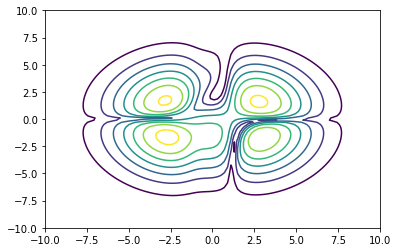

In [96]:
#plot target dist:
xs = np.linspace(-10, 10, 100)
ys = np.linspace(-10, 10, 100)
zs = F_targ_grid(xs, ys) 
xgrid, ygrid = np.meshgrid(xs[::-1], ys)
plt.contour(xgrid, ygrid, zs)
plt.show()

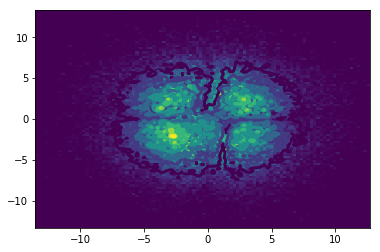

In [97]:
counts,ybins,xbins,image = plt.hist2d(samps_1[:,0],samps_1[:,1],bins=100)
plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
plt.show()

# Part B:

# 1. Plot the accepted sample histories for each $\beta$. What is the acceptance rate for each $\beta$? 

# 2. Explain your results and select the "best" value of $\beta$?

## Making trace plots and 2D histograms for each value of beta

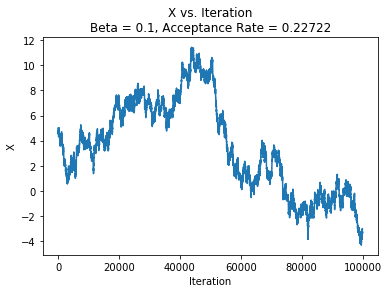

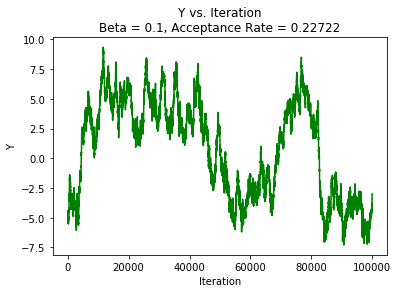

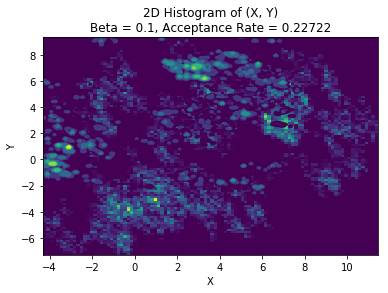

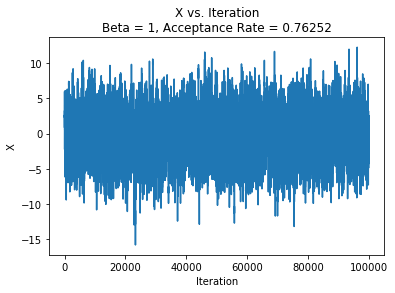

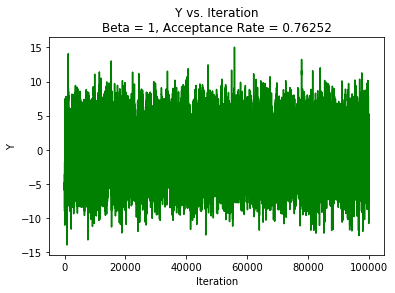

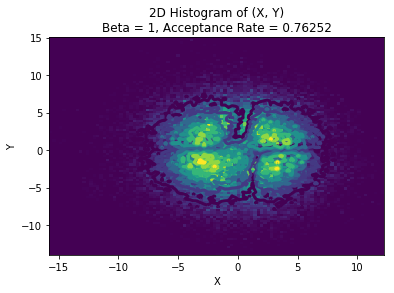

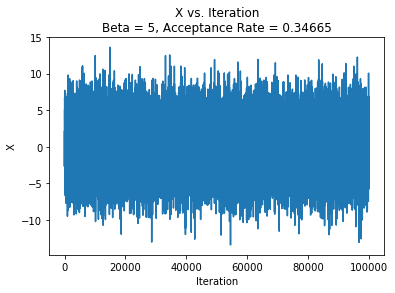

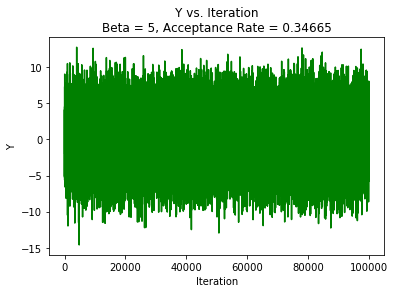

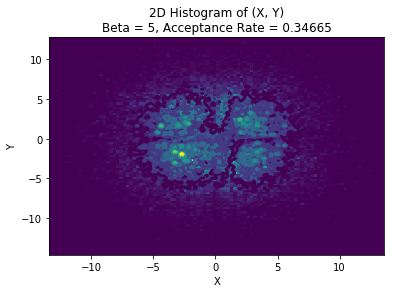

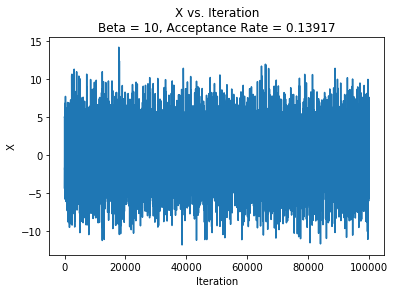

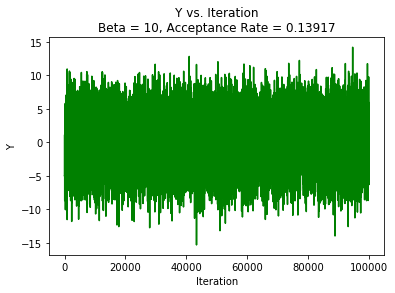

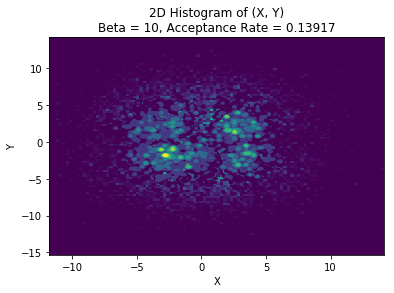

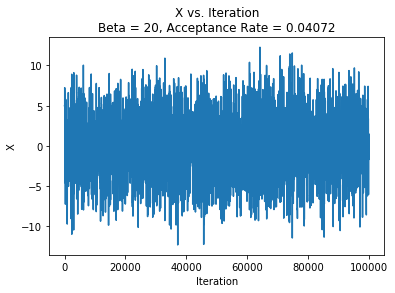

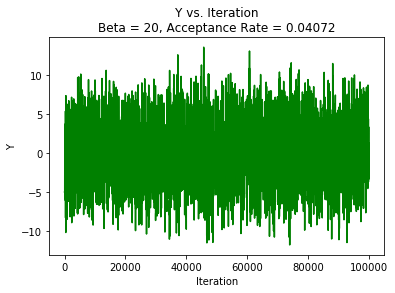

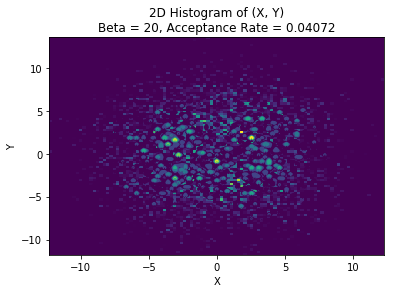

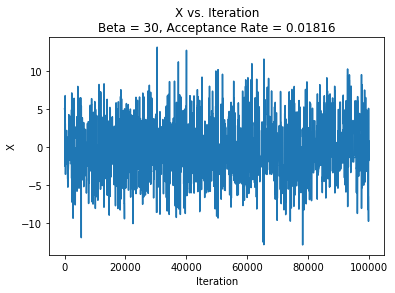

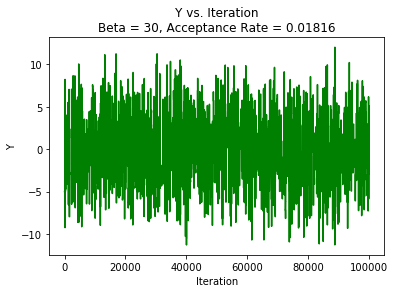

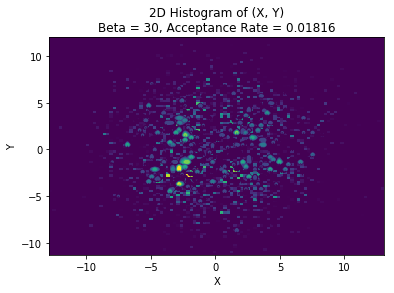

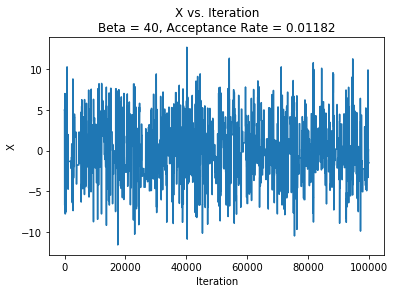

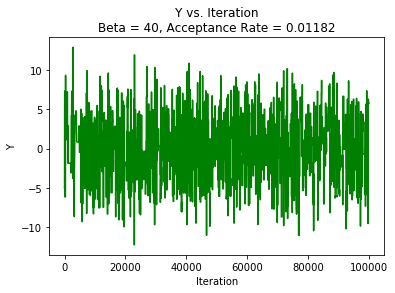

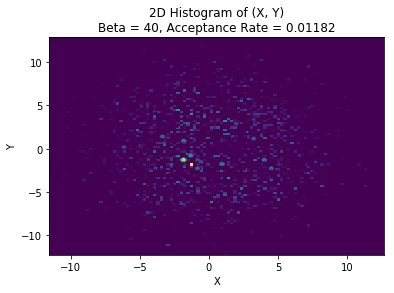

In [100]:
betas = [0.1, 1, 5, 10, 20, 30, 40]
acceptances_list = []
for beta in betas:
    p_tran_1 = lambda xy0, xy1 : p_transition(xy0, xy1, beta)
    prop_1 = lambda xy : prop_mvn(xy, beta)
    Nsamps = 100000
    xinit = np.array([5,-5])
    samps_1, acc_1 = MH(F_targ, p_tran_1, prop_1, Nsamps, xinit)
    acceptances_list.append(acc_1/Nsamps)
    plt.plot(np.arange(Nsamps), samps_1[:, 0])
    plt.title('X vs. Iteration\nBeta = ' + str(beta) +  ', Acceptance Rate = ' + str(acc_1/Nsamps))
    plt.xlabel('Iteration')
    plt.ylabel('X')
    plt.show()
    plt.plot(np.arange(Nsamps), samps_1[:, 1], 'g')
    plt.title('Y vs. Iteration\nBeta = ' + str(beta) +  ', Acceptance Rate = ' + str(acc_1/Nsamps))
    plt.xlabel('Iteration')
    plt.ylabel('Y')
    plt.show()
    counts,ybins,xbins,image = plt.hist2d(samps_1[:,0],samps_1[:,1],bins=100)
    plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
    plt.title('2D Histogram of (X, Y)\nBeta = ' + str(beta) +  ', Acceptance Rate = ' + str(acc_1/Nsamps))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

## Acceptance rates for each value of $\beta$

In [101]:
# acceptance rates for each
for acc_rate, beta in zip(acceptances_list, betas):
    print('Beta = ' + str(beta) + ', acceptance rate = ' + str(acc_rate))

Beta = 0.1, acceptance rate = 0.22722
Beta = 1, acceptance rate = 0.76252
Beta = 5, acceptance rate = 0.34665
Beta = 10, acceptance rate = 0.13917
Beta = 20, acceptance rate = 0.04072
Beta = 30, acceptance rate = 0.01816
Beta = 40, acceptance rate = 0.01182


The samples that result when $\beta=1$ yield the 2D histogram that looks most like the PDF we are trying to sample from, so $\beta=1$ is the best. It also yields the highest acceptance rate, so it makes the best approximation of the target distribution.

# Part C: Choose a symmetric proposal and construct a Metropolis algorithm to produce $N=100,000$ samples from $F(x,y)$ with an initial position of $(x,y) = (5,-5)$. Plot the results.  How do the results compare to those from Metropolis-Hastings in **Parts A & B**?  

### As seen in below tests: 
The acceptance rate is relatively high for a symmetric proposal. (~80% when with variace of 1 for $x$ and $y$)

Similarly the trace-plots seem to show decent convergence, and don't tend to drift all that much. 

I interpret the higher acceptane rate to be a consequence of the symmetric proposal not pushing to enter lower probability spaces. Once it finds a higher probability zone, it's likely to stick there. In fact, lower variance (see var=0.1) showed even higher acceptance (but produced a crappy undersampled histogram), supporting this interpretation: the proposal just sat in high probability regions. 

An asymmetric distribution will try to push to lower probability zones (is more 'risky') and will experience more rejection. 
I know the feeling :-/

### Make symmetric proposal: 
Simply make bivariate normal with identity covariance covariance. Let $[x_0,y_0] = \mathbf{x}_0$
$$
q(\mathbf{x}_1) = \mathbb{N}(\mathbf{x}_0, \sigma^2 \mathbb{I})
$$

In [76]:
def sym_prop(xy, var): 
    """
    return symmetric proposal sample 
    """
    cov = var * np.eye(2)
    sample = np.random.multivariate_normal(xy, cov)
    return sample

def p_transition_sym(xy0, xy1): 
    """
    returns p(xy1 | xy0) for symmetric proposal 
    """
    x0 = xy0[0]
    y0 = xy0[1]
    x1 = xy1[0]
    y1 = xy1[1]
    vx = 1
    vy = 1
    expo = -((x0 - x1)**2 / (2*vx)) - ((y0 - y1)**2 / (2*vy))
    return np.exp(expo)

# Run with covariance = $1 \times I$

In [ ]:
Nsamps = 100000
xinit = np.array([5,-5])
sym_prop_1 = lambda xy: sym_prop(xy, 1)
samps_sym, acc_sym = MH(F_targ, p_transition_sym, sym_prop_1, Nsamps, xinit)

In [ ]:
pc_acc_sym = acc_sym / Nsamps
print('Acceptance Rate for var=1:', pc_acc_sym)

In [ ]:
counts,ybins,xbins,image = plt.hist2d(samps_sym[:,0],samps_sym[:,1],bins=100)
plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
plt.title('Sample Histogram for Symmetric Proposal, var=1')
plt.show()

In [ ]:
#Get trace plots: 
plt.plot(samps_sym[:,0])
plt.ylabel('xs')
plt.title('Symmetric Proposal X values, var=1')
plt.show()

plt.plot(samps_sym[:,1])
plt.ylabel('ys')
plt.title('Symmetric Proposal Y values, var=1')

plt.show()

# Run with covariance = $0.1 \times I$

In [ ]:
Nsamps = 100000
xinit = np.array([5,-5])
sym_prop_p1 = lambda xy: sym_prop(xy, 0.1)
samps_sym_p1, acc_sym_p1 = MH(F_targ, p_transition_sym, sym_prop_p1, Nsamps, xinit)

In [ ]:
pc_acc_sym_p1 = acc_sym_p1 / Nsamps
print('Acceptance Rate for var = 0.1:', pc_acc_sym_p1)

In [ ]:
counts,ybins,xbins,image = plt.hist2d(samps_sym_p1[:,0],samps_sym_p1[:,1],bins=100)
plt.contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=3)
plt.title('Sample Histogram for Symmetric Proposal, var = 0.1')
plt.show()

In [ ]:
#Get trace plots: 
plt.plot(samps_sym_p1[:,0])
plt.ylabel('xs')
plt.title('Symmetric Proposal X values, var=0.1')
plt.show()

plt.plot(samps_sym_p1[:,1])
plt.ylabel('ys')
plt.title('Symmetric Proposal Y values, var=0.1')

plt.show()